In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from thefuzz import fuzz, process
import itertools
from itertools import combinations
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.font_manager as fm
from collections import Counter
from matplotlib import dates as mpl_dates
from matplotlib.animation import FuncAnimation
import random
from mpl_toolkits.mplot3d import Axes3D
from itertools import count
from ipywidgets import interact
import matplotlib.animation as animation
from IPython.display import HTML, Image
from IPython.display import HTML
import csv
import time
from scipy import stats
from statsmodels import robust
from robustbase.stats import mad
import re
import pattern3
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

In [2]:
df=pd.read_csv('E:/Python_file/Hose_sales.csv')

In [56]:
#sns.scatterplot(y=df['SalePrice'],x=df['LotFrontage'])

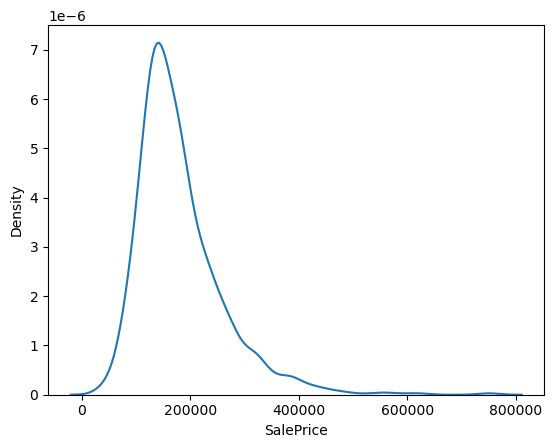

In [3]:
sns.kdeplot(df['SalePrice'])
plt.show()

In [106]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [154]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: xlabel='LotArea', ylabel='SalePrice'>

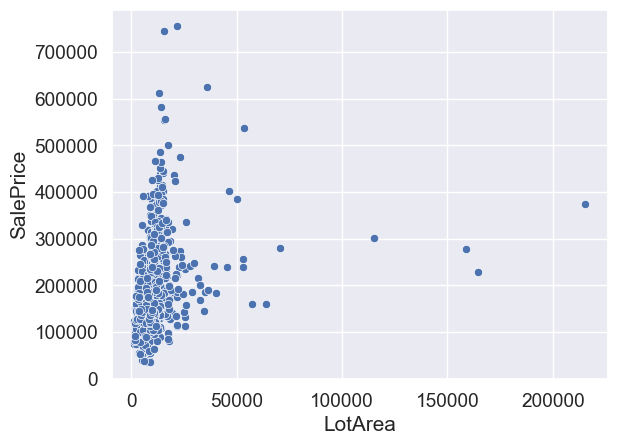

In [189]:
sns.scatterplot(x=df[ 'LotArea'],y=df['SalePrice']) ######### we can ingnored this variables

<Axes: xlabel='GarageQual', ylabel='SalePrice'>

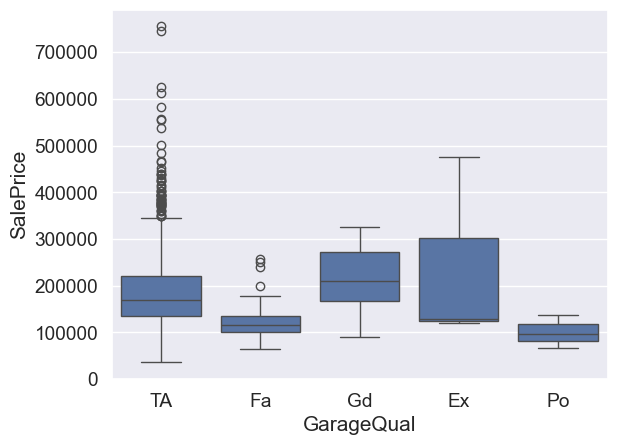

In [187]:
## Grarage quality is not a good this actually!
sns.boxplot(x=df['GarageQual'], y= df['SalePrice'])

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

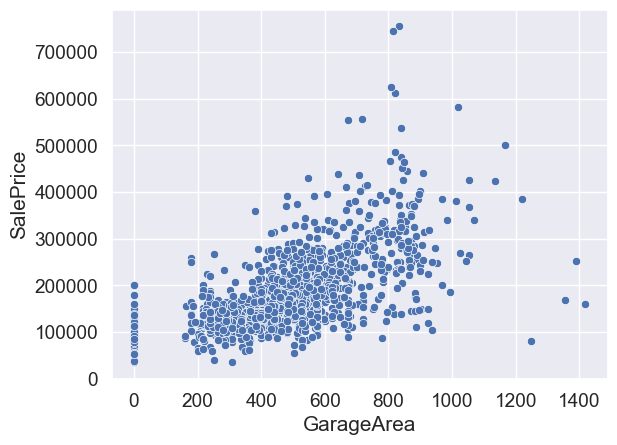

In [185]:
# Yes! We have found a relation ship with grage area!
df['GarageArea'].sample(5)
sns.scatterplot(x=df['GarageArea'], y= df['SalePrice'])

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

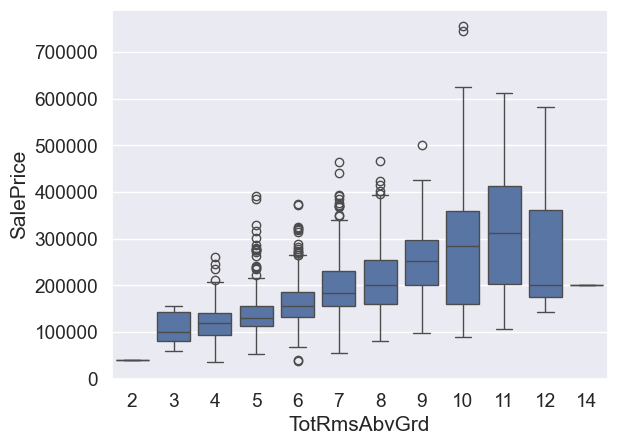

In [183]:
# Opps! It has a linear relationship with SalePrice
df['TotRmsAbvGrd'].isnull().sum()
sns.boxplot(x=df['TotRmsAbvGrd'], y= df['SalePrice'])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

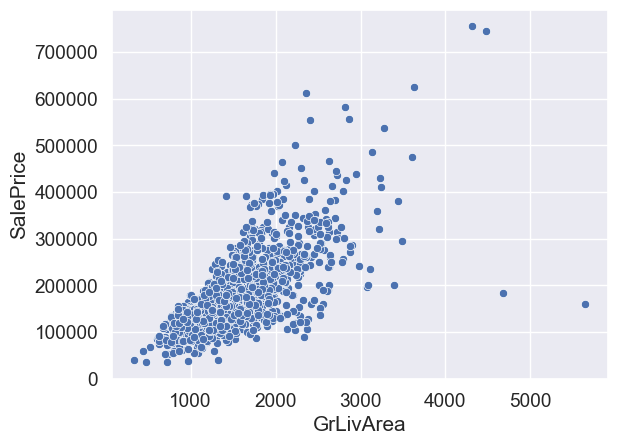

In [177]:
df['GrLivArea'].sample(5)
sns.scatterplot(x=df['GrLivArea'], y= df['SalePrice']) ## Wow! Great GrLivArea have a strong linear relationship with SalePrice

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

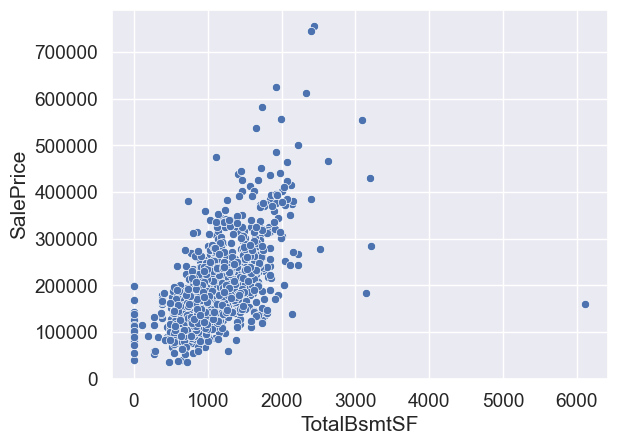

In [174]:
# Yes! TotalBsmtSF have a great relation with Saleprice 
df['TotalBsmtSF'].sample(5)
sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'])

<Axes: xlabel='BsmtQual', ylabel='SalePrice'>

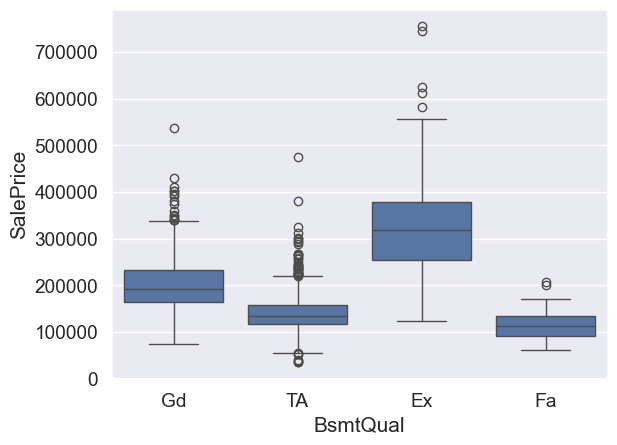

In [171]:
sns.boxplot(x=df['BsmtQual'], y=df['SalePrice'])

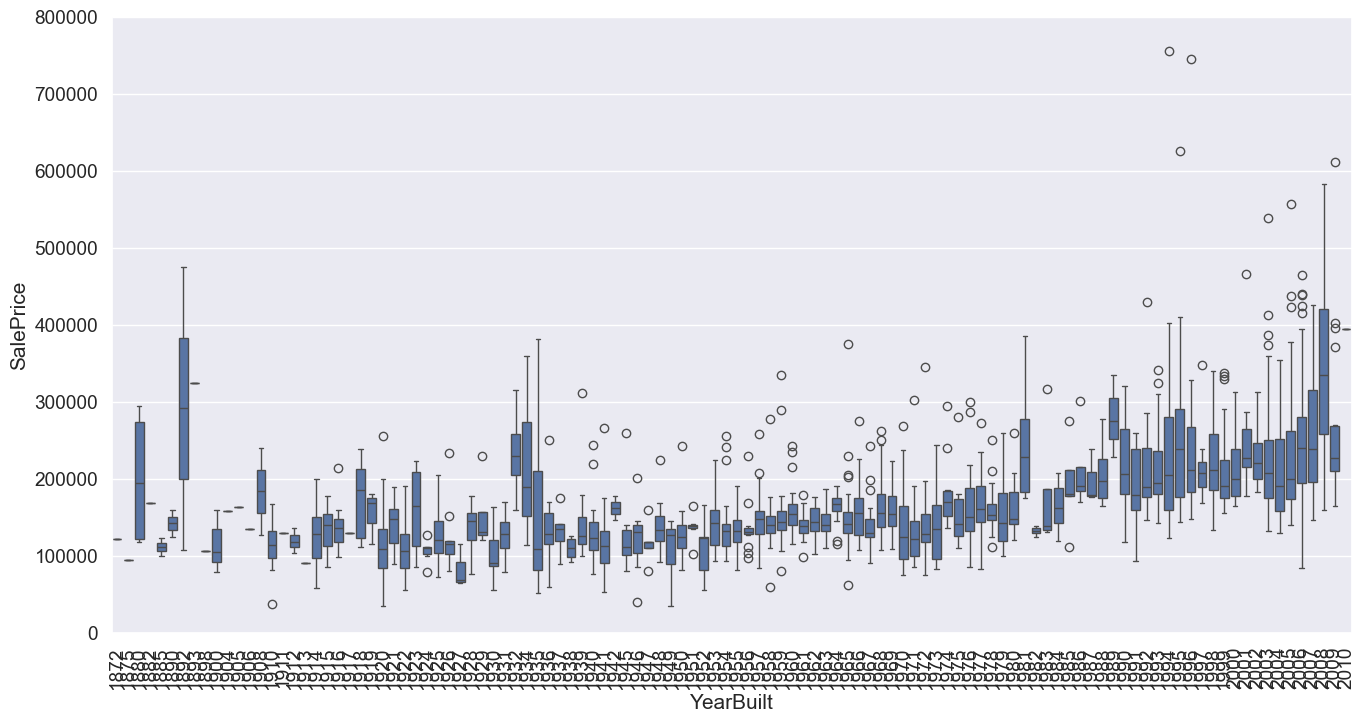

In [169]:
############# YearBuilt havenot good relations with SalePrice ##############
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

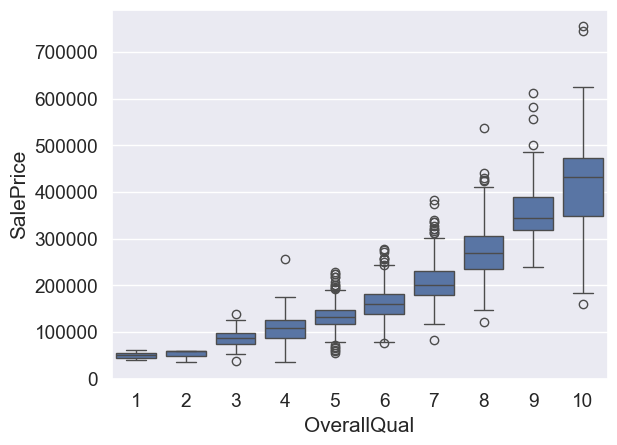

In [161]:
sns.boxplot(x = df['OverallQual'], y = df['SalePrice']) 

In [156]:
df['Utilities'].value_counts() #### we can delete it.

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

## Missing Value handling #############

In [4]:
df['SalePrice'].isnull().sum() ############### Great there is no missing value in my dependent variable

0

In [5]:
df.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [6]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [7]:
#  Missing value percentage
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_value = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_value.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [8]:
missing_value[missing_value['Total'] >37].sort_values(by='Total',ascending=True)

,Total,Percent
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
LotFrontage,259,0.177397
FireplaceQu,690,0.472603
MasVnrType,872,0.597260


In [9]:
withoutmissing=df.drop((missing_value[missing_value['Total'] > 37]).index,axis=1)

In [10]:
withoutmissing.isnull().sum().sort_values(ascending=False)

BsmtQual        37
BsmtFinType1    37
BsmtCond        37
MasVnrArea       8
Electrical       1
                ..
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
MSSubClass       0
SalePrice        0
Length: 67, dtype: int64

In [11]:
final_data=withoutmissing.drop(columns=['BsmtFinType1','MasVnrArea','BsmtFinType1','BsmtCond','Electrical'],axis=1)

In [12]:
final_data.isnull().sum().sort_values(ascending=False)

BsmtQual      37
Id             0
HeatingQC      0
1stFlrSF       0
2ndFlrSF       0
              ..
Foundation     0
BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
SalePrice      0
Length: 63, dtype: int64

In [13]:
final_data['BsmtQual'].value_counts()
final_data['BsmtQual'].fillna('TA',inplace=True)

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3948\2222962618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['BsmtQual'].fillna('TA',inplace=True)


In [14]:
# we can separate data 2 section numerical and categrocial 
#numeric_df = final.select_dtypes(include=['number']) ## without for loop we can use it.
final = final_data.copy()
just_numerical = []
for column in final.columns:
    if final[column].dtype =='int64' or final[column].dtype=='float64':
        just_numerical.append(column)
numerical_df = final[just_numerical]

<Axes: >

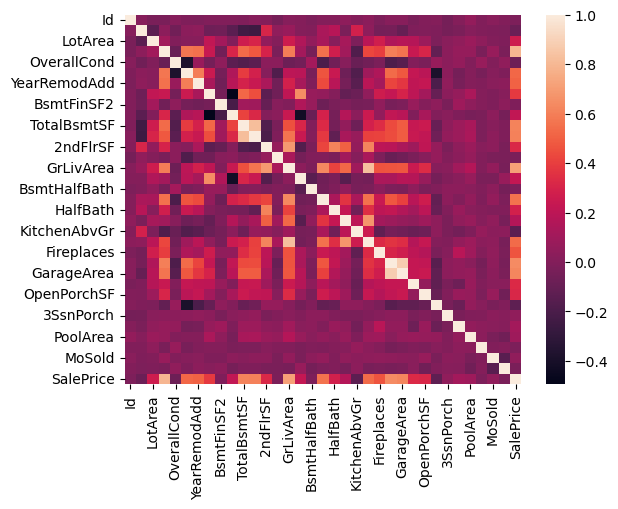

In [15]:
cor=numerical_df.corr()
sns.heatmap(cor)

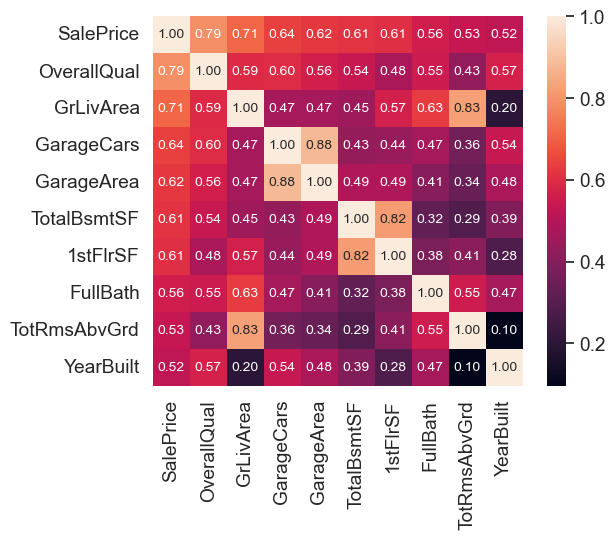

In [16]:
k =10
cols = cor.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(numerical_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
category= final_data.select_dtypes(include='object')
category.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

 ### Now i work with out liars ###

In [110]:
sale_price = final_data['SalePrice'].values.reshape(-1, 1)
#sale_price

In [111]:
standard =StandardScaler().fit_transform(sale_price)

In [112]:
low = standard[standard[:,0].argsort()][:10] 
high = standard[standard[:,0].argsort()][-10:]

In [114]:
print(low)
print(high)

[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


### Bivariate analysis ###

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

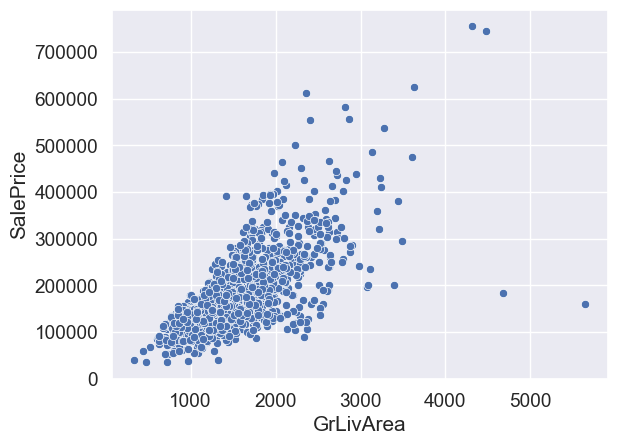

In [116]:
sns.scatterplot(x=final_data['GrLivArea'], y=final_data['SalePrice'])

In [124]:
final_data.sort_values('GrLivArea',ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_scaled
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,480,0,1,2008,New,Partial,160000,-0.263440
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,10,2007,New,Partial,184750,0.048212


In [126]:
final_data.drop(final_data[final_data['Id']==1299].index,inplace=True)

In [127]:
final_data.drop(final_data[final_data['Id']==524].index,inplace=True)

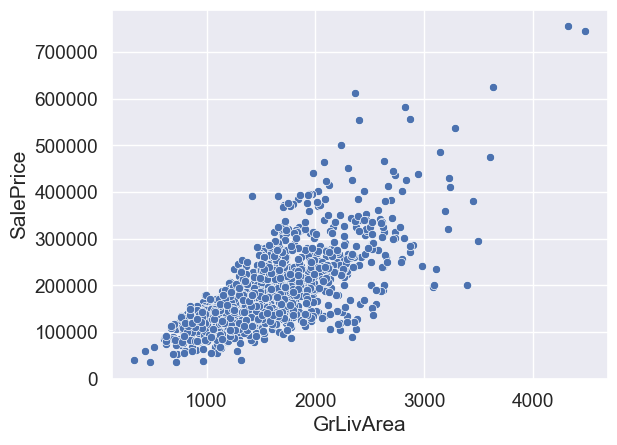

In [129]:
sns.scatterplot(x=final_data['GrLivArea'], y=final_data['SalePrice'])
plt.show()

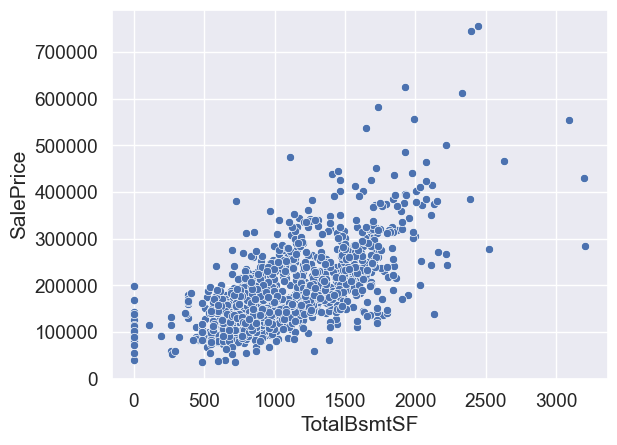

In [137]:
sns.scatterplot(x=final_data['TotalBsmtSF'], y=final_data['SalePrice'])
plt.show()

## Check Normality ##
- Histogram - Kurtosis and skewness.- 
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3948\20065623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['SalePrice'],fit=norm)


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976627, 180932.91906721535, 0.9320154492892369))

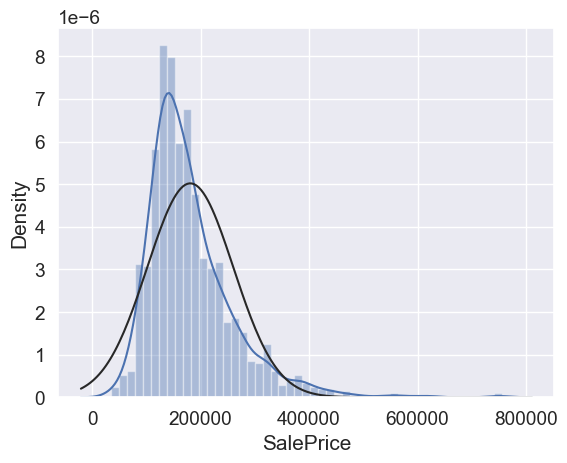

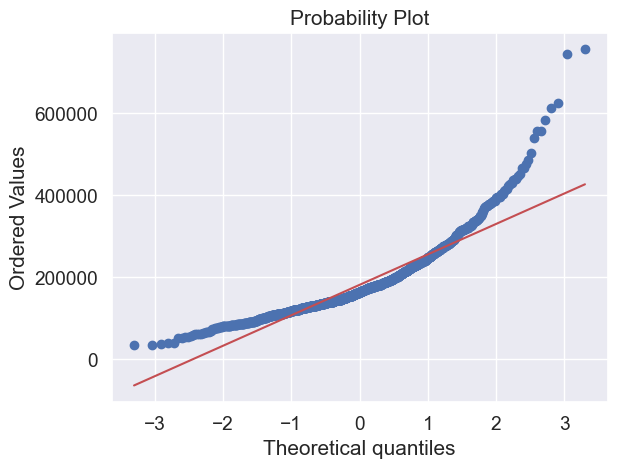

In [151]:
sns.distplot(final_data['SalePrice'],fit=norm)
fig = plt.figure()
stats.probplot(final_data['SalePrice'],plot=plt)

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3948\21802783.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(final_data['SalePrice']),fit=norm)


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.39853206929765134, 12.024008660964794, 0.9953918648311372))

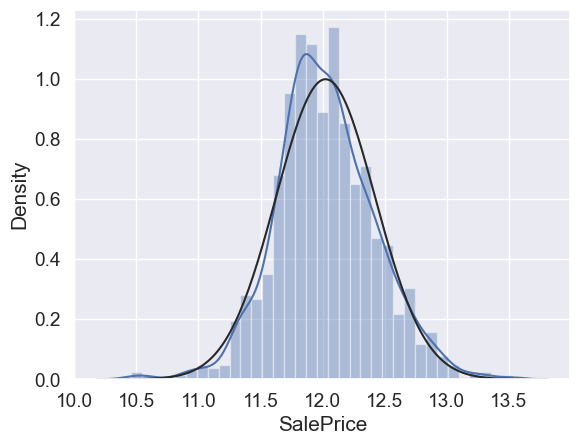

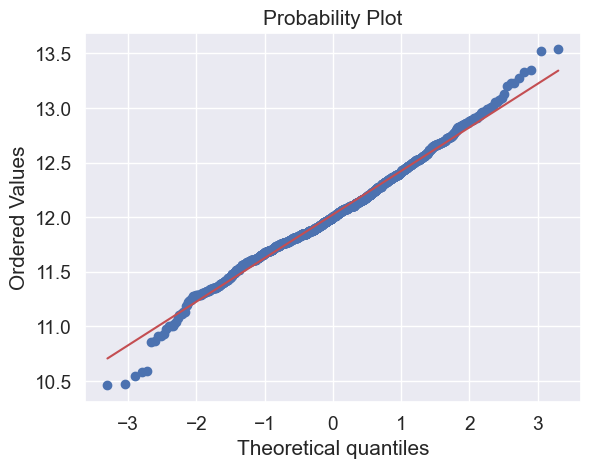

In [154]:
sns.distplot(np.log(final_data['SalePrice']),fit=norm)
fig = plt.figure()
stats.probplot(np.log(final_data['SalePrice']),plot=plt)

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3948\2721035032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['GrLivArea'],fit=norm)


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.69423817403674, 1510.465706447188, 0.9743965913979762))

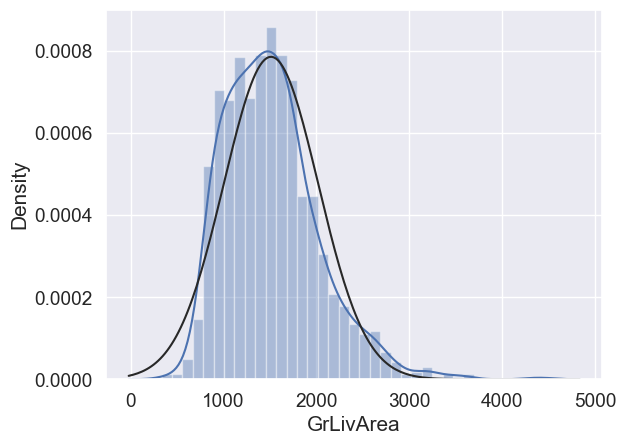

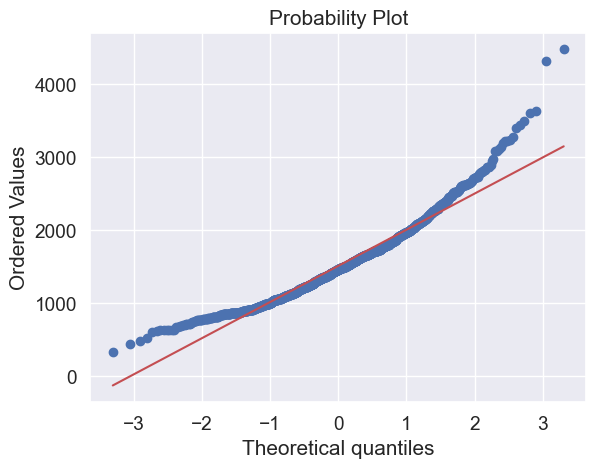

In [155]:
sns.distplot(final_data['GrLivArea'],fit=norm)
fig = plt.figure()
stats.probplot(final_data['GrLivArea'],plot=plt)

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3948\2238754811.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(final_data['GrLivArea']),fit=norm)


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.19616114, 8.37008433,
         8.40648507])),
 (0.3303181178085237, 7.266023599053438, 0.9981312413733032))

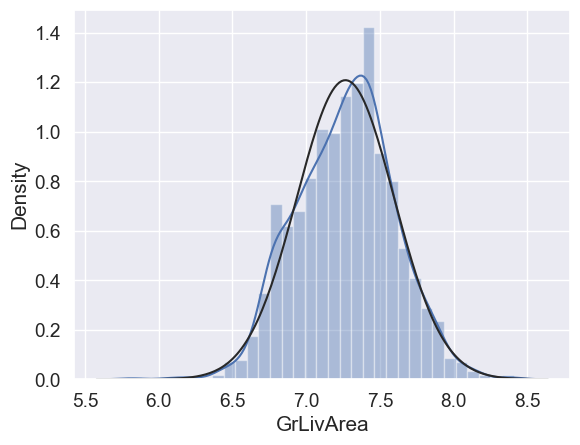

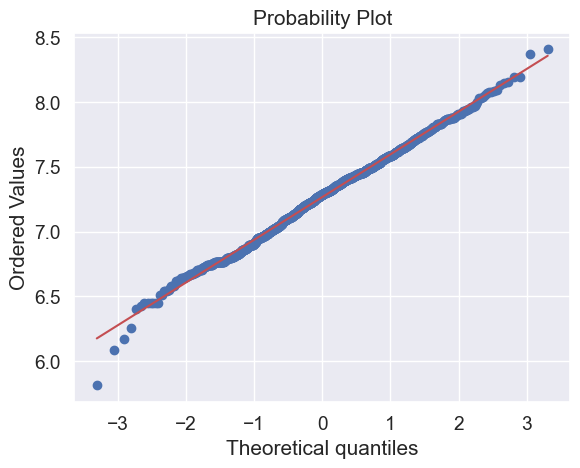

In [156]:
sns.distplot(np.log(final_data['GrLivArea']),fit=norm)
fig = plt.figure()
stats.probplot(np.log(final_data['GrLivArea']),plot=plt)

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3948\1859653924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['TotalBsmtSF'],fit=norm)


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([   0,    0,    0, ..., 3094, 3200, 3206], dtype=int64)),
 (408.30435359925264, 1052.537037037037, 0.9822818887180168))

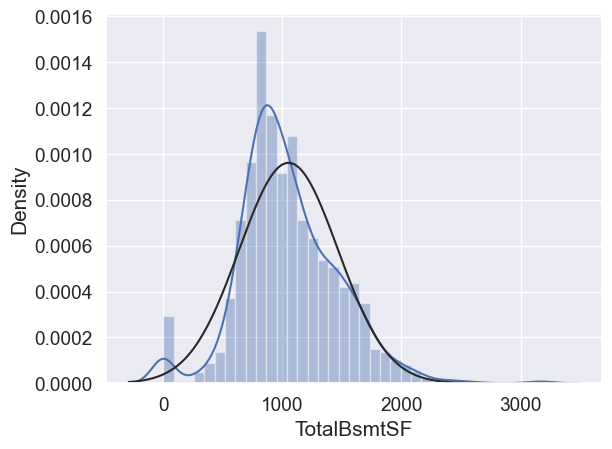

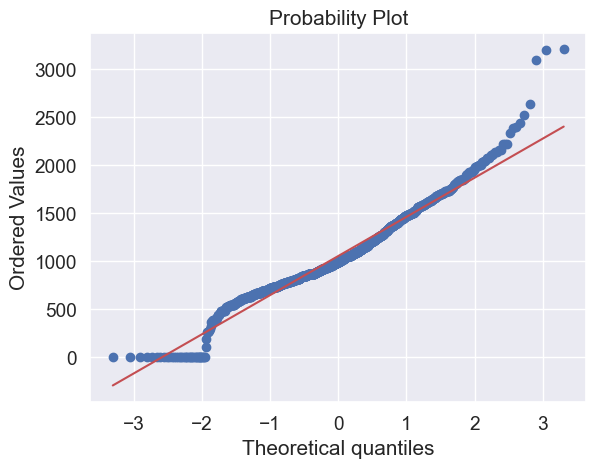

In [157]:
sns.distplot(final_data['TotalBsmtSF'],fit=norm)
fig = plt.figure()
stats.probplot(final_data['TotalBsmtSF'],plot=plt)

In [226]:
df.loc[df['TotalBsmtSF']>0, 'TotalBsmtSF']=np.log(df.loc[df['TotalBsmtSF']>0,'TotalBsmtSF'])

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3948\338430175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)


((array([-3.29794035, -3.04021209, -2.89685519, ...,  2.89685519,
          3.04021209,  3.29794035]),
  array([4.65396035, 5.24702407, 5.5759491 , ..., 8.07090609, 8.07277933,
         8.71768205])),
 (0.35851584053637514, 6.925031281845184, 0.9905075670866063))

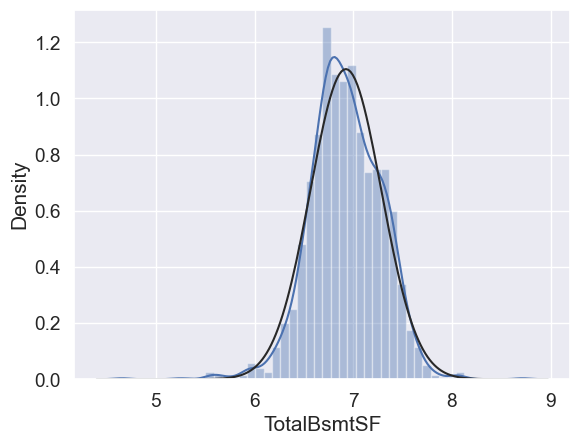

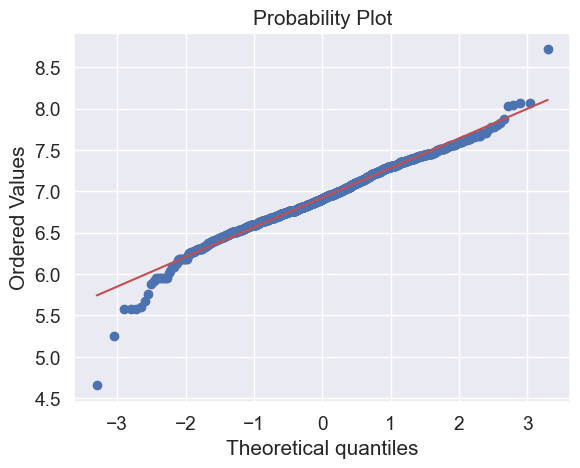

In [222]:
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
fig=plt.figure()
stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

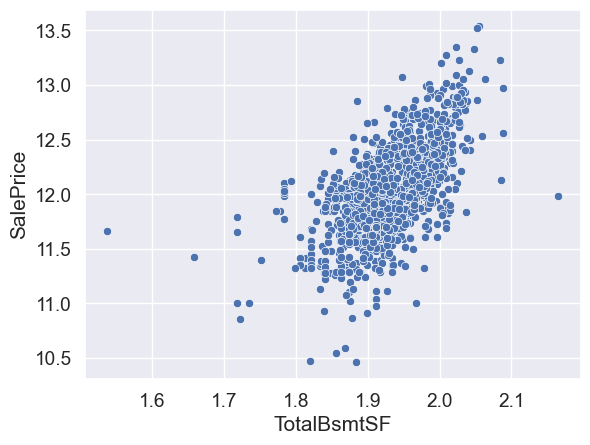

In [231]:
sns.scatterplot(x=df[df['TotalBsmtSF']>0]['TotalBsmtSF'], y= np.log(df[df['TotalBsmtSF']>0]['SalePrice']))

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

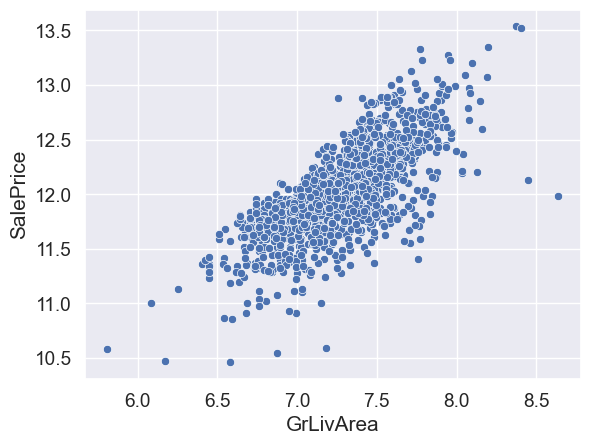

In [233]:
sns.scatterplot(x=np.log(df['GrLivArea']), y=np.log(df['SalePrice']))

## we found Homoscedasticity above this graph ## 
- In statistics, a sequence of random variables is homoscedastic if all its random variables have
- the same finite variance; this is also known as homogeneity
- t-tests and F-tests: These tests rely on the assumption of homoscedasticity

### Conclusion ###

Here, I performed statistical analysis using Python. I identified the values most correlated with SalePrice and gained insights into data distribution. Additionally, I conducted missing value analysis and imputed missing values using different statistical methods such as mean, median, and modeling techniques. Furthermore, I detected outliers and demonstrated how to handle them with log transformation, particularly when the dataset exhibits positive skewness. Finally, I plotted a scatter diagram to check for homoscedasticity, or the homogeneity of variance, in my dataset.